# Area of Environmental Justice Concern Prediction using Random Forest

Title: Area of Environmental Justice Concern Prediction using Random Forest

Author(s): Mattie Gisselbeck and Nikunj Chawla

**Abstract**

Redlining, a historic discriminatory practice that denied financial services such as loans to prevent minority groups from having access to certain areas based on their race or ethnicity, still affects the TCMA today. Historically redlined neighborhoods were and are areas of concentrated poverty. Low-income neighborhoods and BIPOC communities in the TCMA are heavily urbanized, have a higher potential exposures to pollutants, and more vulnerable to environmental factors. To combat this inequality, environmental justice seeks to address the inequity of environmental protection in their communities, attempts to restore this disparity.

The objective of this project is to use a Random Forest model to help to predict areas of environmental justice concern to help bridge the gap of historical disparity in the TCMA. 

**Data Sources**

Metropolitan Council (2021). Equity Considerations for Place-Based Advocacy and Decisions in the Twin Cities Region. <https://gisdata.mn.gov/dataset/us-mn-state-metc-society-equity-considerations>

United States Census Bureau (2010). Minnesota Census Tract (2010). <https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2010&layergroup=Census+Tracts>

## 1. Random Forest Model, Evaluation, and Preparation of the Data

### 1.1. Importing the Data and Creating the Random Forest Model

1.1.1. Importing the libraries necessary to run the Random Forest Regression and evaluate the model

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

1.1.2 Importing the equity considerations dataset

In [2]:
equity_considerations_df = pd.read_csv("data/equity_considerations.csv")

1.1.3 Extracting only the columns deemed relevant for the random forest model, converting the TR10 column to a string, and printing the number of rows and a few rows of the dataset.

The columns deemed relevant are as follows:

**ID**
- TR10: Census Tract ID

**Aggregate Demographics**
- HUTOT_ACS: Total Housing Units (ACS Estimate)
- HHTOT_ACS: Total Households (ACS Estimate)
- POPTOT_ACS: Total Population

**Low-Income Population**
- PPOV185: Percentage of the Population whose Income is Below 185% of the Poverty Line


**BIPOC Population**
- PMENA_ARAB: Percentage of Arab Population
- PMENA_EGYP: Percentage of Egyptian Population
- PMENA_IRAN: Percentage of Iranian Population
- PMENA_ISRA: Percentage of Israeli Population
- PMENA_LEBA: Percentage of Lebanese Population
- PMENA_PALE: Percentage of Palestinian Population
- PMENA_TURK: Percentage of Turkish Population
- PBANC_AFRI: Percentage of Black or African American Population
- PBANC_ETHI: Percentage of Ethiopian Population
- PBANC_NIGE: Percentage of Nigerian Population
- PAMINDNH: Percentage of American Indian Population
- PBANC_ETHI: Percentage of Ethiopian Population
- PBANC_NIGE: Percentage of Nigerian Population
- PAMINDNH: Percentage of American Indian Population
- PBIPOC: Percentage of Black, Indigenous, and People of Color Population
- PPLURALRAC: Percentage of the Population who Identify as Multiracial
- PHISPPOP: Percentage of Hispanic or Latino Population



In [3]:
# The columns deemed relevant
# noinspection SpellCheckingInspection
environmental_justice_columns = [
    "TR10", "TR_EJ", "PMENA_ARAB", "PMENA_EGYP", "PMENA_IRAN", "PMENA_ISRA", "PMENA_LEBA", "PMENA_PALE", "PMENA_TURK",
    "PBANC_AFRI", "PBANC_ETHI", "PBANC_NIGE", "PAMINDNH", "PBIPOC", "PPLURALRAC", "PPOV185", "PHISPPOP",
    "HUTOT_ACS", "HHTOT_ACS", "POPTOT_ACS"
]

# Get the columns deemed relevant
environmental_justice_df = equity_considerations_df[environmental_justice_columns]

# Converts the TR10 column to a string
environmental_justice_tr10_string = environmental_justice_df["TR10"].astype(str)
environmental_justice_df.loc[:, ["TR10"]] = environmental_justice_tr10_string

# Prints the number of rows and a few rows of the dataset
print(len(environmental_justice_df.index))
environmental_justice_df.head()

704


,TR10,TR_EJ,PMENA_ARAB,PMENA_EGYP,PMENA_IRAN,PMENA_ISRA,PMENA_LEBA,PMENA_PALE,PMENA_TURK,PBANC_AFRI,PBANC_ETHI,PBANC_NIGE,PAMINDNH,PBIPOC,PPLURALRAC,PPOV185,PHISPPOP,HUTOT_ACS,HHTOT_ACS,POPTOT_ACS
0,27003050107,0,0.0,0.0,0.0,0.000,0.030,0.0,0.0,0.000,0.0,0.0,0.000,0.040,0.960,0.231,0.000,1030,1006,2900
1,27003050108,0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.011,0.0,0.0,0.001,0.129,0.871,0.161,0.060,1808,1721,5252
2,27003050109,0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.014,0.070,0.930,0.118,0.020,1921,1878,5481
3,27003050110,0,0.0,0.0,0.0,0.000,0.002,0.0,0.0,0.000,0.0,0.0,0.007,0.045,0.955,0.124,0.007,1022,991,2670
4,27003050111,0,0.0,0.0,0.0,0.002,0.000,0.0,0.0,0.008,0.0,0.0,0.003,0.052,0.948,0.091,0.006,1459,1416,3719


1.1.4 Drops all rows with missing values

In [4]:
environmental_justice_df = environmental_justice_df.dropna()

1.1.5 Splits the dataset into the independent variables (X) and the dependent variable (y) and splits the dataset into training and testing sets

In [5]:
# Splits the dataset into the independent variables (X) and the dependent variable (y)
X = environmental_justice_df.drop("TR10", axis = 1).drop("TR_EJ", axis = 1)
y = environmental_justice_df["TR_EJ"]

# Splits the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

1.1.6 Creates the Random Forest Regression model and fits it to the training set, using a fixed random state for reproducibility (performs very similarly even without a fixed random state)

In [6]:
random_forest_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
_ = random_forest_model.fit(X_train, y_train)

### 1.2 Evaluating the Random Forest Model

1.2.1 Predicts the dependent variable (y) using the independent variables (X) in the testing set and evaluates the model

In [7]:
y_test_predicted = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predicted)
r2 = r2_score(y_test, y_test_predicted)

1.2.2 Prints the evaluation metrics

In [8]:
print("Random Forest Model Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

Random Forest Model Evaluation:
MSE: 0.02
r2 score: 0.88


1.2.3 Adds the predicted TR_EJ column to the environmental justice dataset

In [9]:
environmental_justice_df["TR_EJ_PREDICTED"] = random_forest_model.predict(X)

### 1.3 Merging the environmental justice dataset with the census tract geometry

1.3.1 Imports the libraries necessary to import the tract geometry

In [10]:
# Import the libraries necessary to import the tract geometry
import os

# Set the USE_PYGEOS environment variable to 0 to use shapely instead of pygeos
os.environ["USE_PYGEOS"] = "0"

import geopandas as gpd

1.3.2 Imports the census tract geometry, printing the number of rows and a few rows of the dataset

In [11]:
# Gets the 2010 census tract geometry
census_tract_geometry_gdf = gpd.read_file("data/tl_2010_27_tract10/tl_2010_27_tract10.shp")
print(len(census_tract_geometry_gdf.index))
census_tract_geometry_gdf.head()

1338


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,27,139,080202,27139080202,802.02,Census Tract 802.02,G5020,S,5137595,109563,+44.7552888,-093.3779024,"POLYGON ((-93.39902 44.74655, -93.39902 44.747..."
1,27,139,080204,27139080204,802.04,Census Tract 802.04,G5020,S,4730968,120879,+44.7276090,-093.3796796,"POLYGON ((-93.38203 44.73933, -93.38158 44.739..."
2,27,139,080100,27139080100,801,Census Tract 801,G5020,S,3351673,73045,+44.7791951,-093.3392301,"POLYGON ((-93.34248 44.78788, -93.34183 44.787..."
3,27,139,080302,27139080302,803.02,Census Tract 803.02,G5020,S,30396916,952718,+44.7552922,-093.4889616,"POLYGON ((-93.52073 44.72061, -93.52073 44.721..."
4,27,139,080400,27139080400,804,Census Tract 804,G5020,S,2275838,74005,+44.7959317,-093.5182670,"POLYGON ((-93.51900 44.80250, -93.51732 44.803..."


1.3.3 Merges the tract geometry on GEOID10 with the environmental justice dataset on TR10, printing the number of rows and a few rows of the dataset

In [12]:
environmental_justice_df = census_tract_geometry_gdf.merge(environmental_justice_df, left_on = "GEOID10", right_on = "TR10")
print(len(environmental_justice_df.index))
environmental_justice_df.head()

700


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,PBANC_NIGE,PAMINDNH,PBIPOC,PPLURALRAC,PPOV185,PHISPPOP,HUTOT_ACS,HHTOT_ACS,POPTOT_ACS,TR_EJ_PREDICTED
0,27,139,080202,27139080202,802.02,Census Tract 802.02,G5020,S,5137595,109563,...,0.0,0.000,0.217,0.783,0.039,0.046,1881,1824,5881,0.000
1,27,139,080204,27139080204,802.04,Census Tract 802.04,G5020,S,4730968,120879,...,0.0,0.000,0.146,0.854,0.114,0.020,1302,1270,3477,0.000
2,27,139,080100,27139080100,801,Census Tract 801,G5020,S,3351673,73045,...,0.0,0.004,0.355,0.645,0.298,0.128,957,927,2198,0.186
3,27,139,080302,27139080302,803.02,Census Tract 803.02,G5020,S,30396916,952718,...,0.0,0.003,0.260,0.740,0.088,0.031,5182,5094,15724,0.001
4,27,139,080400,27139080400,804,Census Tract 804,G5020,S,2275838,74005,...,0.0,0.000,0.436,0.564,0.353,0.195,1736,1619,4096,0.978


In [23]:
environmental_justice_df.to_csv('/Users/mattiegisselbeck/Desktop/sqlmerged_data.csv', index=False)

# 2. Data Visualization

2.1 Imports the libraries necessary to visualize the data

In [13]:
import folium
from branca.colormap import LinearColormap
import matplotlib.pyplot as plt

2.2 Converts the census tract dataset to EPSG:4326 CRS and plots it

<Axes: >

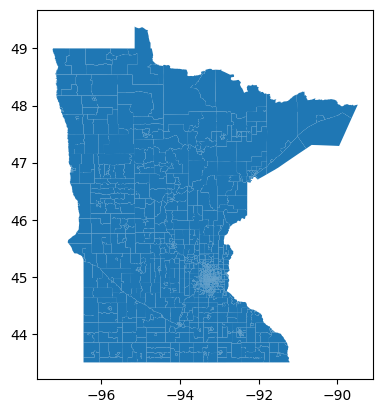

In [14]:
census_tract_geometry_gdf = census_tract_geometry_gdf.to_crs("EPSG:4326")
census_tract_geometry_gdf.plot()

2.3 Converts the environmental justice dataset to EPSG:4326 CRS and plots it

<Axes: >

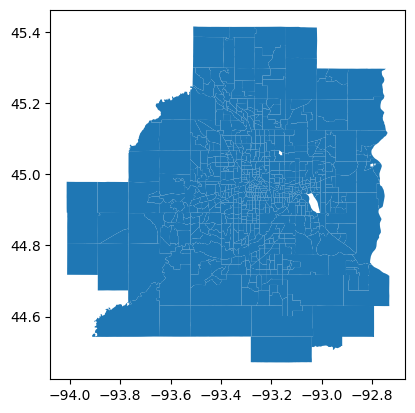

In [15]:
environmental_justice_df = environmental_justice_df.to_crs("EPSG:4326")
environmental_justice_df.plot()

2.4 Calculate the centroid coordinates of the environmental justice dataset geometry tracts

In [16]:
centroid_lat = environmental_justice_df["geometry"].apply(lambda x: x.centroid.y).mean()
centroid_lon = environmental_justice_df["geometry"].apply(lambda x: x.centroid.x).mean()

2.5 Creates a folium map object at the centroid coordinates of the environmental justice dataset geometry tracts

In [17]:
ej_prediction_map = folium.Map(location = [centroid_lat, centroid_lon], zoom_start = 9)

2.6 Creates a linear color map with a gradient from transparent to blue

In [18]:
colormap = LinearColormap(
    colors = [(255, 255, 255, 0), (121, 17, 27, 255)],
    index = [0, 1],
    vmin = 0,
    vmax = 1
)

2.7 Add the environmental justice dataset to the map, using the tract IDs and the predicted TR_EJ column as the tooltip and using the predicted TR_EJ column as a linear interpolation between transparent and blue for the fill color

In [19]:
_ = folium.GeoJson(
    environmental_justice_df,
    name = "Area of Environment Concern Prediction",
    tooltip = folium.features.GeoJsonTooltip(
        fields = ["TR10", "TR_EJ_PREDICTED"],
        aliases = ["Census Tract ID", "Prediction"],
        localize = True
    ),
    style_function = lambda feature: {
        "fillColor": colormap(feature["properties"]["TR_EJ_PREDICTED"]),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    }
).add_to(ej_prediction_map)

2.8 Display the map that predicts whether each census tract is an area of environmental justice concern with fully blue meaning that a census tract is predicted to be an area of environmental justice concern and fully transparent meaning the opposite

In [20]:
ej_prediction_map

2.9 Classify the census tracts into areas of environmental concern and areas not of environmental concern and present the total of each

In [21]:
environmental_justice_df["TR_EJ_PREDICTED"].apply(lambda x: 1 if x >= 0.5 else 0).value_counts()

TR_EJ_PREDICTED
0    529
1    171
Name: count, dtype: int64

2.10 Histogram of the predicted environmental justice values

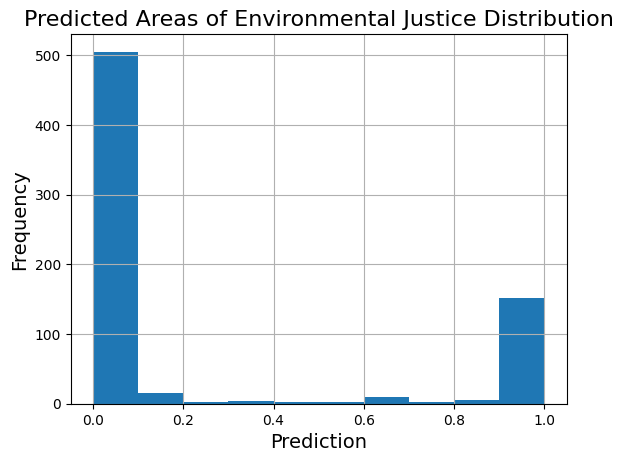

In [22]:
environmental_justice_df["TR_EJ_PREDICTED"].hist()

plt.title("Predicted Areas of Environmental Justice Distribution", fontsize = 16)
plt.xlabel("Prediction", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()